Implementing Linear Regression and Gradient from scratch

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
import math

In [41]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = (w*x[i]) + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2 * m) * cost
    return total_cost

In [42]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw, dj_db = 0, 0
    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


In [46]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    J_history,p_history = list(),list()  
 #J_history (List): History of cost values
#p_history (list): History of parameters [w,b] 

    w,b = w_in,b_in
    for i  in range(num_iters):
        dj_dw,dj_db =compute_gradient(x,y,w,b)
        b = b - alpha*dj_db
        w = w - alpha*dj_dw
        if i < 10000:
            J_history.append(compute_cost(x,y,w,b))
            p_history.append([w,b])
        if i % np.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing
        

In [47]:
x_train,y_train = np.array([1.0,2.0]),np.array([300.0,500.0])

In [48]:
w_init,b_init = 0,0
iter = 10000
tmp_alpha = 1.0e-2
w_final,b_final,J_hist,p_hist = gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,iter,compute_cost(x_train,y_train,w_init,b_init),compute_gradient(x_train,y_train,w_init,b_init)) 
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


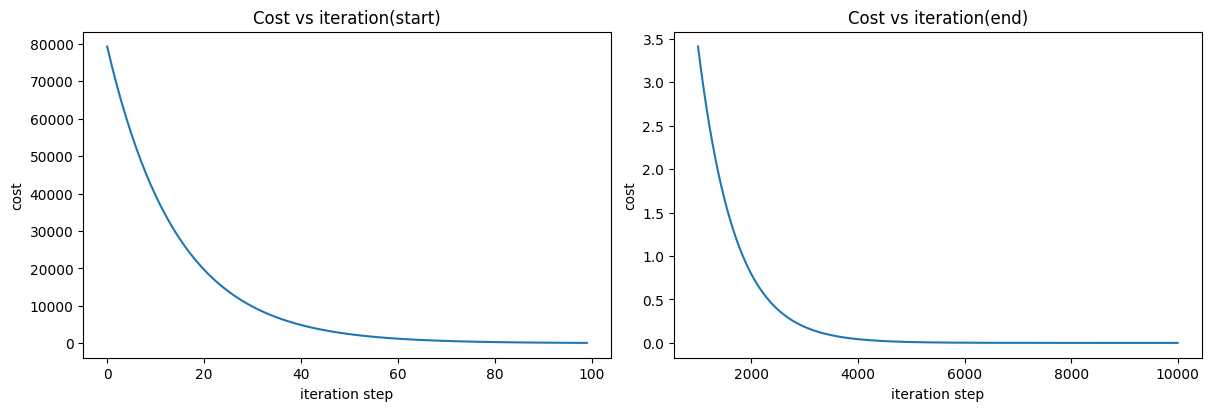

In [49]:
#Cost function vs gradient descent 
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])),J_hist[1000:])
ax1.set_title("Cost vs iteration(start)")
ax2.set_title("Cost vs iteration(end)")
ax1.set_ylabel('cost')
ax2.set_ylabel('cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
